<a href="https://colab.research.google.com/github/elsonyeh/computer-programming-and-application/blob/main/B117610020_104%E4%BA%BA%E5%8A%9B%E9%8A%80%E8%A1%8C%E8%81%B7%E7%BC%BA%E8%B3%87%E6%96%99%E6%93%B7%E5%8F%96%E8%88%87%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 題目：104人力銀行職缺資料擷取與分析

## 摘要

本報告基於 104 人力銀行所擷取之職缺資料集，針對 IT 技術職缺市場進行初步探討，分析不同職缺類別下的公司數量、職缺地點分布及薪資區間，藉此瞭解目前資訊相關職務的人才需求狀況。研究中透過數據整理、描述性統計與視覺化分析，嘗試釐清各地區職缺機會分布差異、公司需求集中度以及不同職缺間的薪資落差，期望提供求職者職涯規劃與人力市場觀察之參考依據。

## 引言

### 背景
隨著資訊科技快速發展，相關 IT 產業職缺持續成長，包括前端工程師、後端工程師、資料分析師等不同技術領域均有穩定人才需求。透過網路公開平台（如 104 人力銀行）蒐集職缺資訊，可觀察目前市場上企業需求趨勢、薪資水準與地區分布現況。

### 目的
本研究旨在透過 104 人力銀行職缺資料，針對 IT 技術相關職缺進行初步分析，探討不同職缺關鍵字的公司分布、地區集中現象，以及薪資區間之變化趨勢，作為求職者與人力資源相關單位之決策參考。

### 待答問題
1. 職缺樣本資料中，公司需求是否集中於特定企業？
2. 各職缺主要集中在哪些工作地點？
3. 各職缺薪資描述區間大致落在哪些範圍？

## 方法

### 數據來源
使用資料來源：104職缺資料.csv（爬蟲固定各關鍵字擷取30筆）

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入 `tips` 數據集並檢視數據概況。
2. 探索性數據分析（EDA）以了解數據分佈與異常值。
3. 繪製散點圖、長條圖、盒狀圖等，分析關鍵變數之間的關係。

In [13]:
# 下載台北黑體字型
!wget -O NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true

--2025-06-15 15:12:02--  https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/notofonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true [following]
--2025-06-15 15:12:02--  https://github.com/notofonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/notofonts/noto-cjk/raw/refs/heads/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf [following]
--2025-06-15 15:12:03--  https://github.com/notofonts/noto-cjk/raw/refs/heads/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf
Reusing existing connection to github.com:4

In [14]:
# 匯入套件
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

# 讀取檔案
df = pd.read_csv("104職缺資料.csv")
display(df.head())

# 顯示設定
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 新增字體
matplotlib.font_manager.fontManager.addfont("NotoSansCJKtc-Regular.otf")
# 設定中文字型及負號正確顯示
plt.rcParams["font.sans-serif"] = ["Noto Sans CJK TC"]
plt.rcParams["axes.unicode_minus"] = False

,職缺名稱,公司名稱,工作地點,薪資,職缺連結
0,軟體工程師 Golang,線上探索科技股份有限公司,台北市大同區,待遇面議,https://www.104.com.tw/job/14271913
1,"【北士科】Software Engineer, Legal Automation &amp;...",沛思坦網路股份有限公司,台北市北投區,待遇面議,https://www.104.com.tw/job/14559109
2,軟體工程師,衡碁科技股份有限公司,新竹縣湖口鄉,"月薪42,000~60,000元",https://www.104.com.tw/job/11446450
3,程式軟體工程師,泳鉅鑫再生塑料股份有限公司,台南市永康區,"月薪50,000~80,000元",https://www.104.com.tw/job/14669353
4,"軟體工程師（software engineer)（Tijuana, Mexico)",松澤企業股份有限公司,墨西哥,"年薪1,000,000~2,000,000元",https://www.104.com.tw/job/14659513


## 結果與分析

### 公司名稱分布
我們先計算公司名稱在資料集中出現的次數，作為各公司刊登職缺數量的統計，並使用長條圖呈現前 10 名公司之職缺數量分布情形。

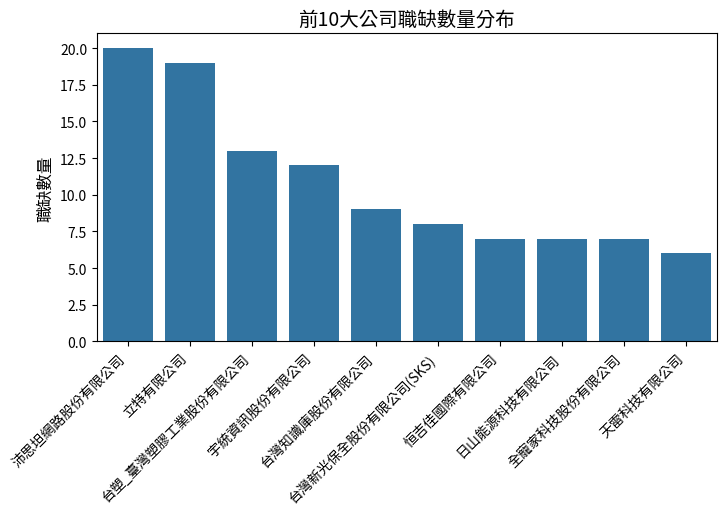

In [15]:
# 計算公司職缺數量
company_counts = df["公司名稱"].value_counts()

# 繪製長條圖
plt.figure(figsize=(8,4))

sns.barplot(x=company_counts.head(10).index, y=company_counts.head(10).values)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("前10大公司職缺數量分布", fontsize=14)
plt.ylabel("職缺數量", fontsize=12)
plt.xlabel("")
plt.show()


**分析結果**：從圖中可見，樣本資料中的職缺多集中於部分公司，其中包括大型科技公司與外包派遣公司，顯示部分企業持續有較高徵才需求。

### 工作地點分布分析
我們統計各工作地點出現次數，觀察職缺主要集中在哪些地區。使用長條圖顯示前 10 大地點的職缺分布狀況。

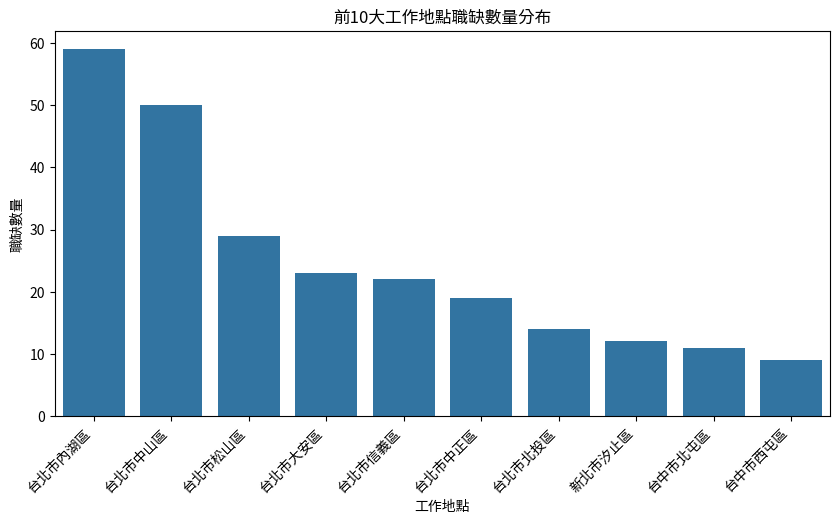

In [16]:
# 計算地點職缺數量
location_counts = df["工作地點"].value_counts()

# 繪製長條圖
plt.figure(figsize=(8,4))
sns.barplot(x=location_counts.head(10).index, y=location_counts.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title("前10大工作地點職缺數量分布")
plt.ylabel("職缺數量")
plt.show()

**分析結果**：觀察結果顯示，大多數 IT 技術職缺集中於台北市、新北市及台中市等都會區，顯示科技相關產業仍多集中在北部與中部地區。

### 薪資分布分析
由於薪資欄位為文字描述，我們使用正則表達式擷取薪資字串中出現的最低數字，將薪資轉換為數值型資料，再繪製直方圖觀察薪資區間的分布。

count       203.000000
mean      41929.206897
std       14287.933588
min         190.000000
25%       35000.000000
50%       40000.000000
75%       47500.000000
max      130000.000000
Name: 最低薪資估算, dtype: float64


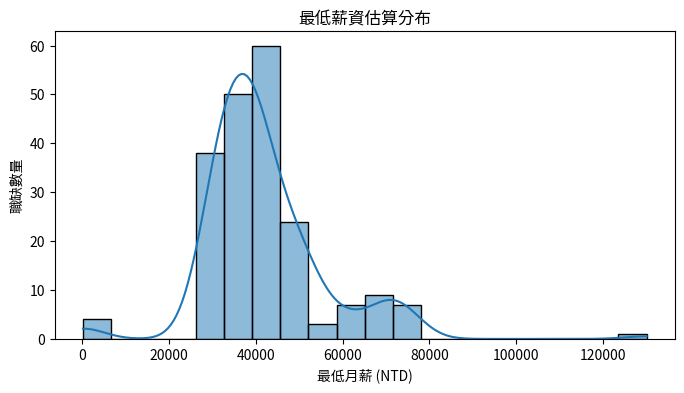

In [20]:
# 排除薪資為 0 或 None
salary_data = df["最低薪資估算"].dropna()
salary_data = salary_data[salary_data > 0]

# 去除高於 200000 的極端值
salary_data = salary_data[salary_data <= 200000]

print(salary_data.describe())

plt.figure(figsize=(8,4))
sns.histplot(salary_data, bins=20, kde=True)
plt.title("最低薪資估算分布")
plt.xlabel("最低月薪 (NTD)")
plt.ylabel("職缺數量")
plt.show()

**分析結果**：從圖中可見，大部分 IT 技術職缺的最低薪資約集中於 30,000 至 60,000 元區間；經去除極端值後，分布右偏但符合新鮮人與一般工程師常見薪資區間，顯示不同資歷需求之市場結構。

## 結論與建議


### 結論
1. IT 技術職缺在本次樣本中呈現出公司需求集中現象，部分大型企業或派遣公司刊登職缺數量較多。
2. 職缺主要集中於北部與中部都會區，如台北市、新北市與台中市，反映出科技產業地區聚落效應。
3. 薪資水準大致分布於 3 萬至 6 萬區間，經過極端值清理後仍呈現右偏態，顯示市場上同時存在新進與資深職缺需求差異。
4. 整體資料展現出台灣 IT 職缺市場在技術領域、地區集中、薪資層級等面向的結構特性。

### 建議
1. 求職者可優先關注主要職缺集中地區，並針對職缺類型加強對應技術能力，提升職涯競爭力。
2. 企業在人力資源策略上，可針對資深與高階人才需求，提供更具吸引力之薪資與福利條件。
3. 後續研究可擴大擷取樣本數量、涵蓋更多關鍵字與詳細職缺內容，進行更深入職缺趨勢與產業需求分析。


